In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import math
import datetime as dt
import random
from scipy.spatial import distance
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pandas import read_excel
from numpy import concatenate
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from math import sqrt
plt.style.use('fivethirtyeight')

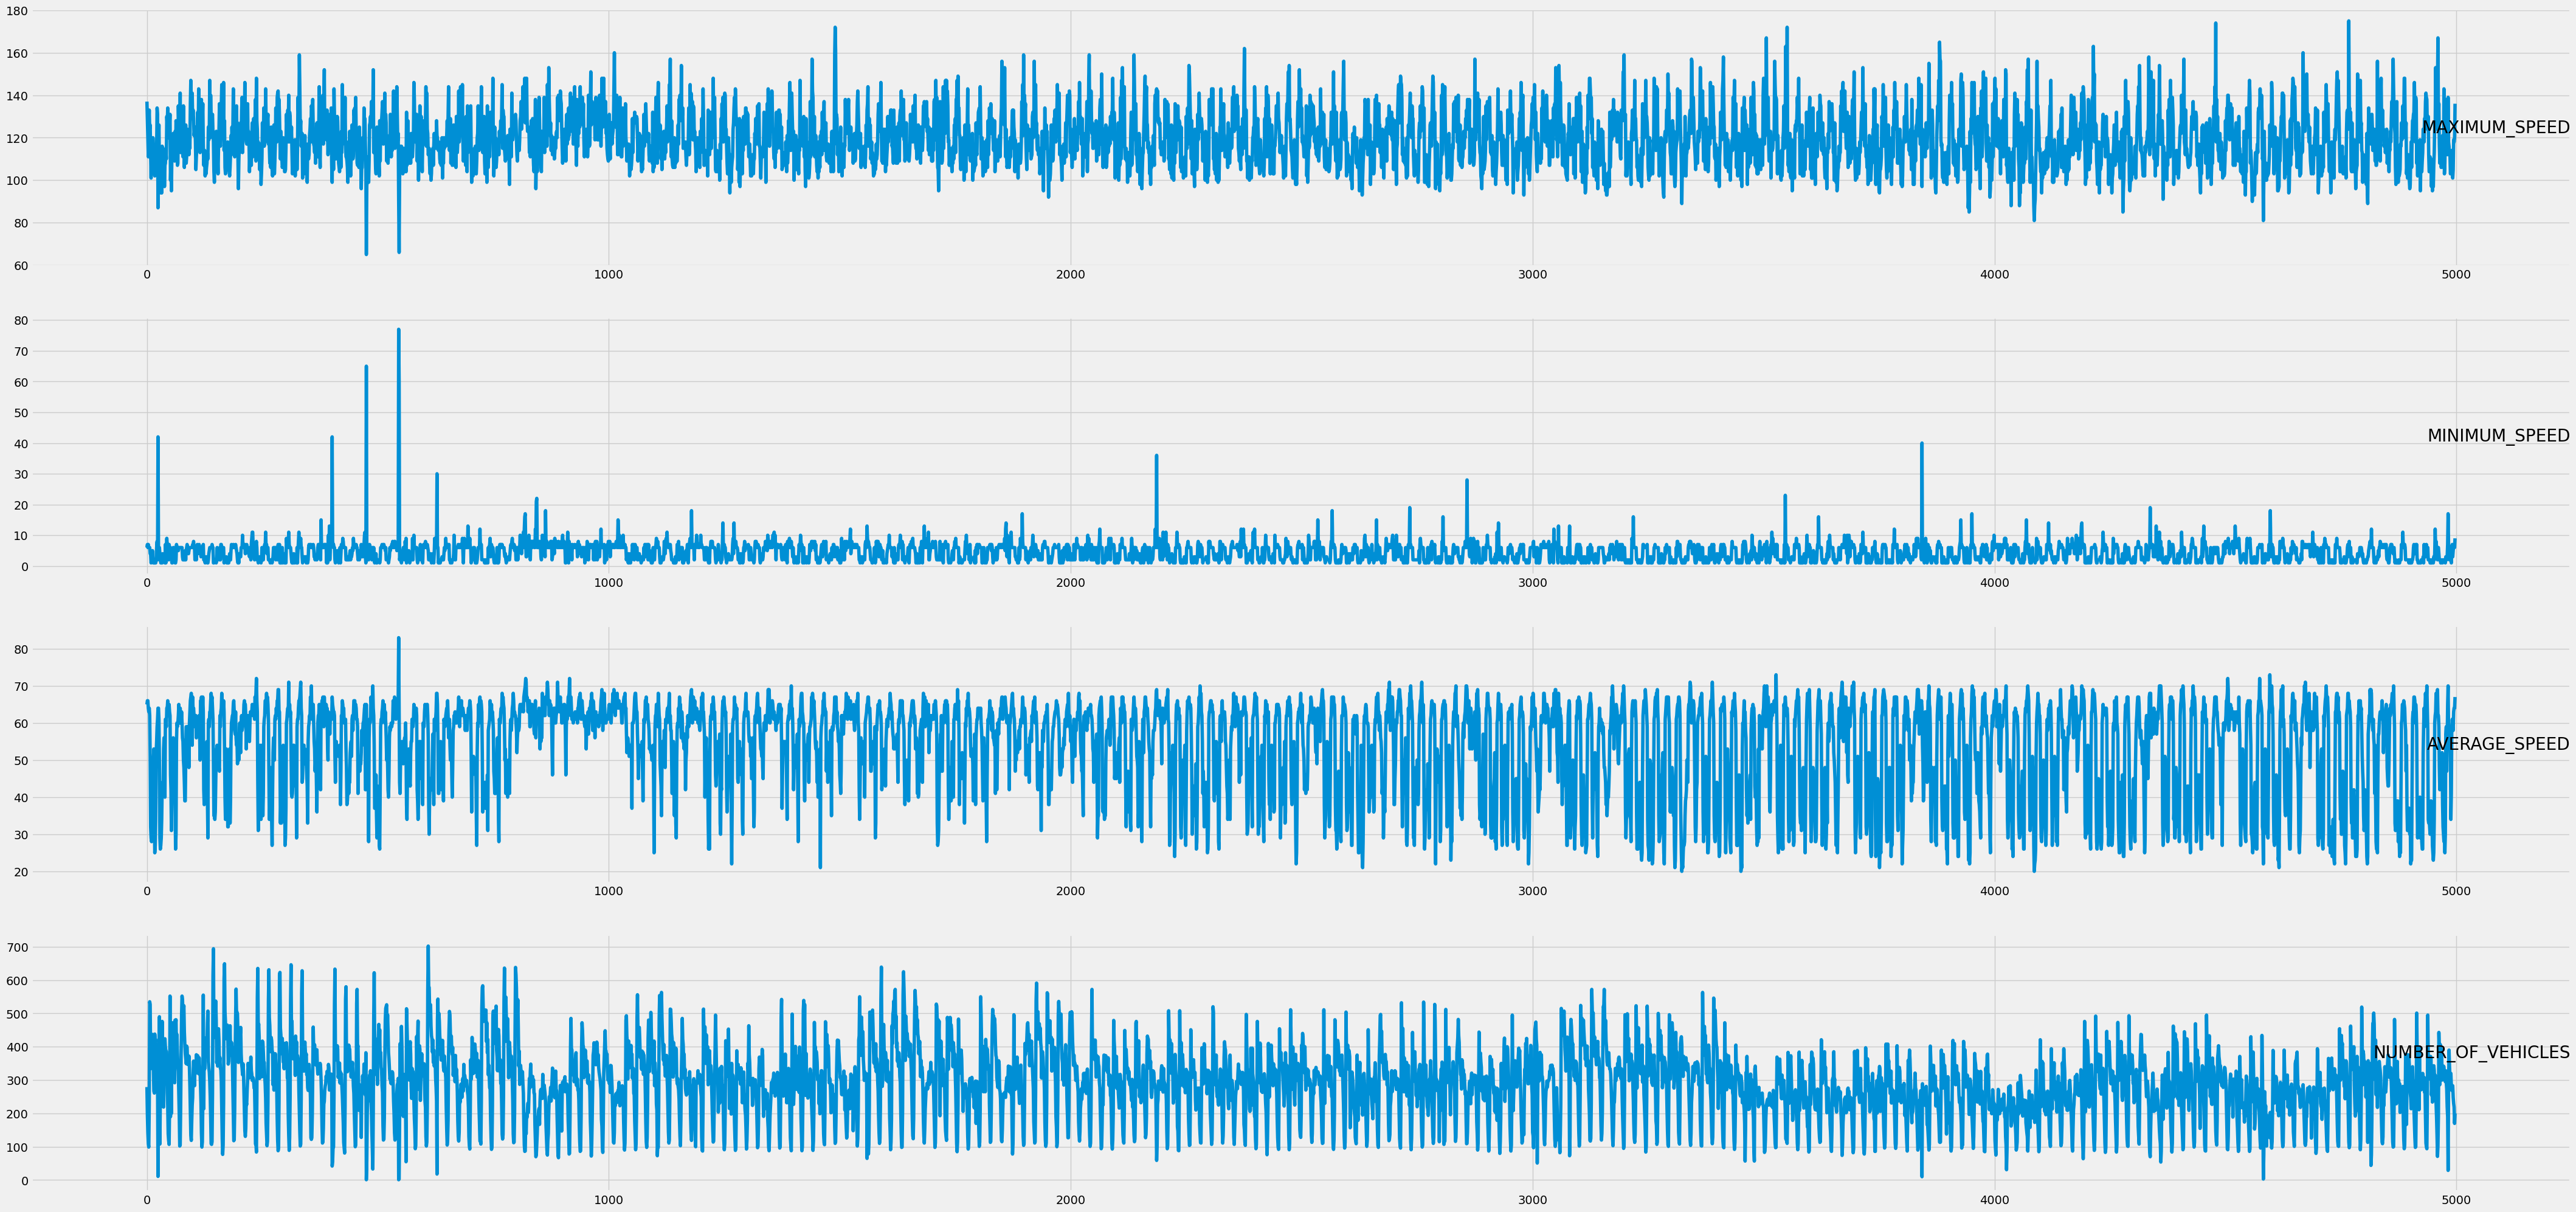

In [2]:
# load dataset
dataset = read_excel(r'C:\sxk96j_2_6ay.xlsx', header=0, index_col=0)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# specify columns to plot
groups = [0, 1, 2, 3]
i = 1
# plot each column
pyplot.figure(figsize=(48, 24))
for group in groups:
 pyplot.subplot(len(groups), 1, i)
 pyplot.plot(values[:, group])
 pyplot.title(dataset.columns[group], y=0.5, loc='right')
 i += 1
pyplot.show()

In [3]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
        n_vars = 1 if type(data) is list else data.shape[1]
        df = DataFrame(data)
        cols, names = list(), list()
        # input sequence (t-n, ... t-1)
        for i in range(n_in, 0, -1):
                cols.append(df.shift(i))
                names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
                cols.append(df.shift(-i))
                if i == 0:
                        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
                else:
                        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
        # put it all together
        agg = concat(cols, axis=1)
        agg.columns = names
        # drop rows with NaN values
        if dropnan:
                agg.dropna(inplace=True)
        return agg

In [4]:
# specify the number of lag hours
n_hours = 6
n_steps = 3
n_features = 4
n_obs = n_hours * n_features
n_x = (n_hours * n_features) - n_steps
# frame as supervised learning
reframed = series_to_supervised(values, n_hours, n_steps)
# drop columns we don't want to predict

for i in range (0,n_steps):
   reframed.drop(reframed.columns[[n_obs+i,n_obs+i+1,n_obs+i+3]], axis=1, inplace=True) 

reframed

var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var1(t-5)  var2(t-5)  \
6         137.0        6.0       65.0      279.0      129.0        7.0   
7         129.0        7.0       66.0      196.0      120.0        6.0   
8         120.0        6.0       66.0      142.0      111.0        7.0   
9         111.0        7.0       64.0      109.0      127.0        6.0   
10        127.0        6.0       63.0       99.0      133.0        6.0   
...         ...        ...        ...        ...        ...        ...   
4991      112.0        2.0       55.0      343.0      112.0        4.0   
4992      112.0        4.0       56.0      310.0      103.0        3.0   
4993      103.0        3.0       53.0      285.0      104.0        2.0   
4994      104.0        2.0       34.0      320.0      110.0        1.0   
4995      110.0        1.0       41.0      283.0      114.0        6.0   

      var3(t-5)  var4(t-5)  var1(t-4)  var2(t-4)  ...  var2(t-2)  var3(t-2)  \
6          66.0      196.0      120.0        6.0  ...        6.0       63.0   
7          66.0      142.0      111.0        7.0  ...        6.0       64.0   
8          64.0      109.0      127.0        6.0  ...        6.0       62.0   
9          63.0       99.0      133.0        6.0  ...        4.0       51.0   
10         64.0      226.0      124.0        6.0  ...        4.0       32.0   
...         ...        ...        ...        ...  ...        ...        ...   
4991       56.0      310.0      103.0        3.0  ...        1.0       41.0   
4992       53.0      285.0      104.0        2.0  ...        6.0       59.0   
4993       34.0      320.0      110.0        1.0  ...        7.0       61.0   
4994       41.0      283.0      114.0        6.0  ...        3.0       59.0   
4995       59.0      269.0      111.0        7.0  ...        5.0       58.0   

      var4(t-2)  var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var3(t)  \
6          99.0      133.0        6.0       64.0      226.0     62.0   
7         226.0      124.0        6.0       62.0      535.0     51.0   
8         535.0      126.0        4.0       51.0      527.0     32.0   
9         527.0      113.0        4.0       32.0      363.0     29.0   
10        363.0      101.0        1.0       29.0      335.0     28.0   
...         ...        ...        ...        ...        ...      ...   
4991      283.0      114.0        6.0       59.0      269.0     61.0   
4992      269.0      111.0        7.0       61.0      278.0     59.0   
4993      278.0      101.0        3.0       59.0      283.0     58.0   
4994      283.0      105.0        5.0       58.0      248.0     63.0   
4995      248.0      119.0        7.0       63.0      230.0     64.0   

      var3(t+1)  var3(t+2)  
6          51.0       32.0  
7          32.0       29.0  
8          29.0       28.0  
9          28.0       34.0  
10         34.0       45.0  
...         ...        ...  
4991       59.0       58.0  
4992       58.0       63.0  
4993       63.0       64.0  
4994       64.0       64.0  
4995       64.0       67.0  

[4990 rows x 27 columns]

In [5]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
reframed = scaler.fit_transform(reframed)

In [6]:
# split into train and test sets
# %60 Train % 40 Test
TRAIN_SIZE = 0.60
train = reframed[:int(len(reframed)*TRAIN_SIZE), :]
test = reframed[int(len(reframed)*TRAIN_SIZE):, :]

# split into input and outputs
train_X, train_Y = train[:, :n_obs], train[:, -n_steps:]
test_X, test_Y = test[:, :n_obs], test[:, -n_steps:]
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape, len(test_X))

(2994, 24) (2994, 3) (1996, 24) (1996, 3) 1996


In [7]:
# define the fi function to construct the fi matrix 
def fi(x,cListe,sigmaListe):
    fimatris = []
    for i in range(0, fi_n):
        fimatris += [np.exp(-((distance.euclidean(x, cListe[1][i, :])) ** 2) / (2 * sigmaListe[1][0, i] ** 2))]
    fimatris = np.array(fimatris)
    return (fimatris)

# derivative of fi-c-matris
def derivfic(x,cListe,sigmaListe):
    derivficmatris = []
    for i in range(0, fi_n):
        derivficmatris += [((x - cListe[1][i, :]) / (sigmaListe[1][0, i] ** 2)) * (
            np.exp(-((distance.euclidean(x, cListe[1][i, :])) ** 2) / (2 * sigmaListe[1][0, i] ** 2)))]
    derivficmatris = np.array(derivficmatris)
    return (derivficmatris)

# derivative of fi-sigma
def derivfisigma(x,cListe,sigmaListe):
    derivfimatris = []
    for i in range(0, fi_n):
        derivfimatris += [((distance.euclidean(x, cListe[1][i, :])) ** 2) / sigmaListe[1][0, i] ** 3 * (
            np.exp(-((distance.euclidean(x, cListe[1][i, :])) ** 2) / (2 * sigmaListe[1][0, i] ** 2)))]
    derivfimatris = np.array(derivfimatris)
    return (derivfimatris)

# define the Wturet function to calculate weight matrix
def Wturet(WListe,e):
    Wturet = []
    turet = np.dot(WListe[1].T, e.reshape(Outputcolumn, 1))
    for i in range(0, Inputcolumn):
        Wturet += [turet]
    Wturet = np.array(Wturet)
    return ((Wturet.T).reshape(fi_n, Inputcolumn))



In [8]:
Inputmatrix = train_X
Inputcolumn = Inputmatrix.shape[1]
Inputrow = Inputmatrix.shape[0]
train_Y = train_Y.reshape(-1,n_steps)
Outputmatrix = train_Y
Outputcolumn = Outputmatrix.shape[1]
Outputrow = Outputmatrix.shape[0]


Inputtestmatrix = test_X
Inputtestcolumn = Inputtestmatrix.shape[1]
Inputtestrow = Inputtestmatrix.shape[0]
test_Y = test_Y.reshape(-1,n_steps)
Outputmatrixtest = test_Y
Outputtestcolumn = Outputmatrixtest.shape[1]
Outputtestrow = Outputmatrixtest.shape[0]

In [9]:

# define the number of neuron
fi_n = Inputcolumn - 2


# define the alpha value for momentum term
alfa = 0.07


# define necessary variables
E_iterasyon = []
E_iterasyon_test = []
EgitimSure = []

itrsayisi = 400


In [10]:

n1 = dt.datetime.now()
    # define the matrix consisting of c vectors
ceski = [[round(random.uniform(0.1, 0.9), 2) for x in range(Inputcolumn)] for y in range(fi_n)]
cyeni = [[round(random.uniform(0.1, 0.9), 2) for x in range(Inputcolumn)] for y in range(fi_n)]
cListe = [np.array(ceski), np.array(cyeni)]

    # define the array containing the sigma values
sigmaeski = [[round(random.uniform(1.5, 4.5), 2) for x in range(fi_n)] for y in range(1)]
sigmayeni = [[round(random.uniform(1.5, 4.5), 2) for x in range(fi_n)] for y in range(1)]
sigmaListe = [np.array(sigmaeski), np.array(sigmayeni)]

    # create weight matrices that will be used for the momentum term
Weski = [[round(random.uniform(0.01, 0.25), 2) for x in range(fi_n)] for y in range(Outputcolumn)]
Wyeni = [[round(random.uniform(0.01, 0.25), 2) for x in range(fi_n)] for y in range(Outputcolumn)]
WListe = [np.array(Weski), np.array(Wyeni)]

E = []
W_son = []
E_ort = []
E_ani_max = []

In [11]:
# Training phase:
for j in range(0, itrsayisi):

        # define step sizes to update weights
        adimbuyuklugu = 0.020  #- j * (0.060 / itrsayisi)

        E_ani = []
        
        for i in range(0, Inputrow):
            # calculate output value 
            Y = np.dot(WListe[1], fi(Inputmatrix[i, :],cListe,sigmaListe))

            # calculate error term
            e = Outputmatrix[i, :] - Y
            E_ani.append(0.5 * np.dot(e.T, e))

            
            # keep the weights before update
            W_tut = WListe[1]
            c_tut = cListe[1]
            sigma_tut = sigmaListe[1]
            # keep updated weights as second item of list
            WListe[1] = WListe[1] + adimbuyuklugu * np.dot(e.reshape(Outputcolumn, 1),
                                                           fi(Inputmatrix[i, :],cListe,sigmaListe).reshape(1, fi_n)) + alfa * (
                                    WListe[1] - WListe[0])
            cListe[1] = cListe[1] + adimbuyuklugu * Wturet(WListe,e) * derivfic(Inputmatrix[i, :],cListe,sigmaListe) + alfa * (
                        cListe[1] - cListe[0])
            sigmaListe[1] = sigmaListe[1] + adimbuyuklugu * np.dot(WListe[1].T, e.reshape(Outputcolumn, 1)) * (
                derivfisigma(Inputmatrix[i, :],cListe,sigmaListe).reshape(fi_n, 1)) + alfa * (sigmaListe[1] - sigmaListe[0])
            # keep the weights of one step before as the first item in the list
            WListe[0] = W_tut
            cListe[0] = c_tut
            sigmaListe[0] = sigma_tut

        #E.append(np.mean(E_ani))
    # 4. loss function Hesaplama
    
        #E_ani.append((1 / 2) * np.dot(e.T, e))
    
        E_ort.append((1 / np.size(train_X, 0)) * sum(E_ani))
        E_ani_max.append(max(E_ani))
    
        if j >= 21:
           if abs((E_ort[j - 1]) - (E_ort[j])) <= 0.0000000001 or (E_ort[j - 20]) - (E_ort[j]) <  -0.005:
             print("E_ort_degisim=",(E_ort[j - 20]) - (E_ort[j]))
             break
print("j=",j)
        

    # keep the latest updated weight matrix
if len(W_son) == 0:
    W_son = np.array(WListe[1])
    c_son = np.array(cListe[1])
    sigma_son = np.array(sigmaListe[1])

n2 = dt.datetime.now()


j= 399


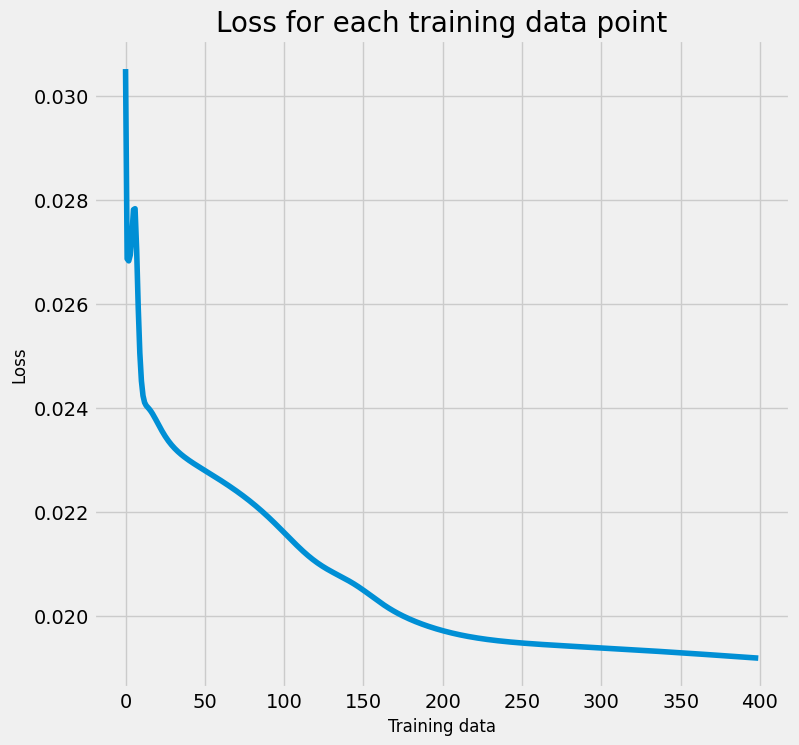

In [12]:
# 5. Her Iterasyon icin hatayi cizdiriyoruz

plt.figure(figsize=(8, 8))
plt.plot(E_ort)
plt.title('Loss for each training data point', fontsize=20)
plt.xlabel('Training data', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.show()

In [13]:
EgitimSure.append(n2-n1)
EgitimSure

[datetime.timedelta(seconds=2019, microseconds=475790)]

In [14]:
E_ani_train = []
y_train_pred =[]
E_ani_test = []
y_test_pred = []

In [15]:
 # Train predict phase:
for i in range(0, Inputrow):
        # calculate output value 
        Ytrain = np.dot(W_son, fi(Inputmatrix[i, :],cListe,sigmaListe))

        # calculate error term
        etrain = Outputmatrix[i, :] - Ytrain
        E_ani_train.append(0.5 * np.dot(etrain.T, etrain))
        y_train_pred.append(Ytrain)

In [16]:
 # Test predict phase:
for i in range(0, Inputtestrow):
        # calculate output value 
        Ytest = np.dot(W_son, fi(Inputtestmatrix[i, :],cListe,sigmaListe))

        # calculate error term
        etest = Outputmatrixtest[i, :] - Ytest
        E_ani_test.append(0.5 * np.dot(etest.T, etest))
        y_test_pred.append(Ytest)


In [17]:
y_test = test_Y.reshape(-1,n_steps)
x_test = test_X
y_train = train_Y.reshape(-1,n_steps)
x_train = train_X

In [18]:

# Scaling the predictions
y_train_pred = concatenate((x_train[:, -n_obs:], y_train_pred), axis=1)
y_train_pred = scaler.inverse_transform(y_train_pred)
y_train_pred = y_train_pred[:,-n_steps:]

y_test_pred = concatenate((x_test[:, -n_obs:], y_test_pred), axis=1)
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test_pred = y_test_pred[:,-n_steps:]


In [19]:
# Scaling the original values
y_train = concatenate((x_train[:, -n_obs:], y_train), axis=1)
y_train = scaler.inverse_transform(y_train)
y_train = y_train[:,-n_steps:]

y_test = concatenate((x_test[:, -n_obs:], y_test), axis=1)
y_test = scaler.inverse_transform(y_test)
y_test = y_test[:,-n_steps:]

In [20]:
score_tr = math.sqrt(mean_squared_error(y_train, y_train_pred))
print("Train data score: %.2f RMSE" % score_tr)

score_t = math.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test data score: %.2f RMSE" % score_t)

Train data score: 13.41 RMSE
Test data score: 15.65 RMSE


In [21]:
from sklearn.metrics import mean_absolute_percentage_error

error_mape_tr = 100*mean_absolute_percentage_error(y_train, y_train_pred)
print("Train data score: %.2f MAPE" % error_mape_tr)

error_mape_t = 100*mean_absolute_percentage_error(y_test, y_test_pred)
print("Test data score: %.2f MAPE" % error_mape_t)
error_mape_t0 = 100*mean_absolute_percentage_error(y_test[:,0], y_test_pred[:,0])
print("Test t zamanı score: %.2f MAPE" % error_mape_t0)
error_mape_t1 = 100*mean_absolute_percentage_error(y_test[:,1], y_test_pred[:,1])
print("Test t+1 zamanı score: %.2f MAPE" % error_mape_t1)
error_mape_t2 = 100*mean_absolute_percentage_error(y_test[:,2], y_test_pred[:,2])
print("Test t+2 zamanı score: %.2f MAPE" % error_mape_t2)


Train data score: 21.71 MAPE
Test data score: 30.66 MAPE
Test t zamanı score: 23.65 MAPE
Test t+1 zamanı score: 33.14 MAPE
Test t+2 zamanı score: 35.18 MAPE


In [22]:
mdape_tr = np.median((np.abs(np.subtract(y_train, y_train_pred)/ y_train))) * 100
print("Train data score: %.2f MdAPE" % mdape_tr)

mdape_t = np.median((np.abs(np.subtract(y_test, y_test_pred)/ y_test))) * 100
print("Test data score: %.2f MdAPE" % mdape_t)

Train data score: 19.29 MdAPE
Test data score: 19.56 MdAPE


In [23]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

error_smape_tr = smape(y_train,y_train_pred)
print("Train data score: %.2f SMAPE" % error_smape_tr)

error_smape_t = smape(y_test,y_test_pred)
print("Test data score: %.2f SMAPE" % np.mean(error_smape_t))

Train data score: 68.93 SMAPE
Test data score: 76.08 SMAPE


In [24]:
from sklearn.metrics import mean_absolute_error
e_tr = y_train - y_train_pred
scale = mean_absolute_error(y_train[1:], y_train[:-1])
mase_tr = np.mean(np.abs(e_tr / scale))
print("Train data score: %.2f MASE" % mase_tr)

e_t = y_test - y_test_pred
scale = mean_absolute_error(y_test[1:], y_test[:-1])
mase_t = np.mean(np.abs(e_t / scale))
print("Test data score: %.2f MASE" % mase_t)

Train data score: 2.49 MASE
Test data score: 2.24 MASE


In [25]:
train_y=y_train
pred_train_y=y_train_pred
test_y=y_test
pred_test_y=y_test_pred

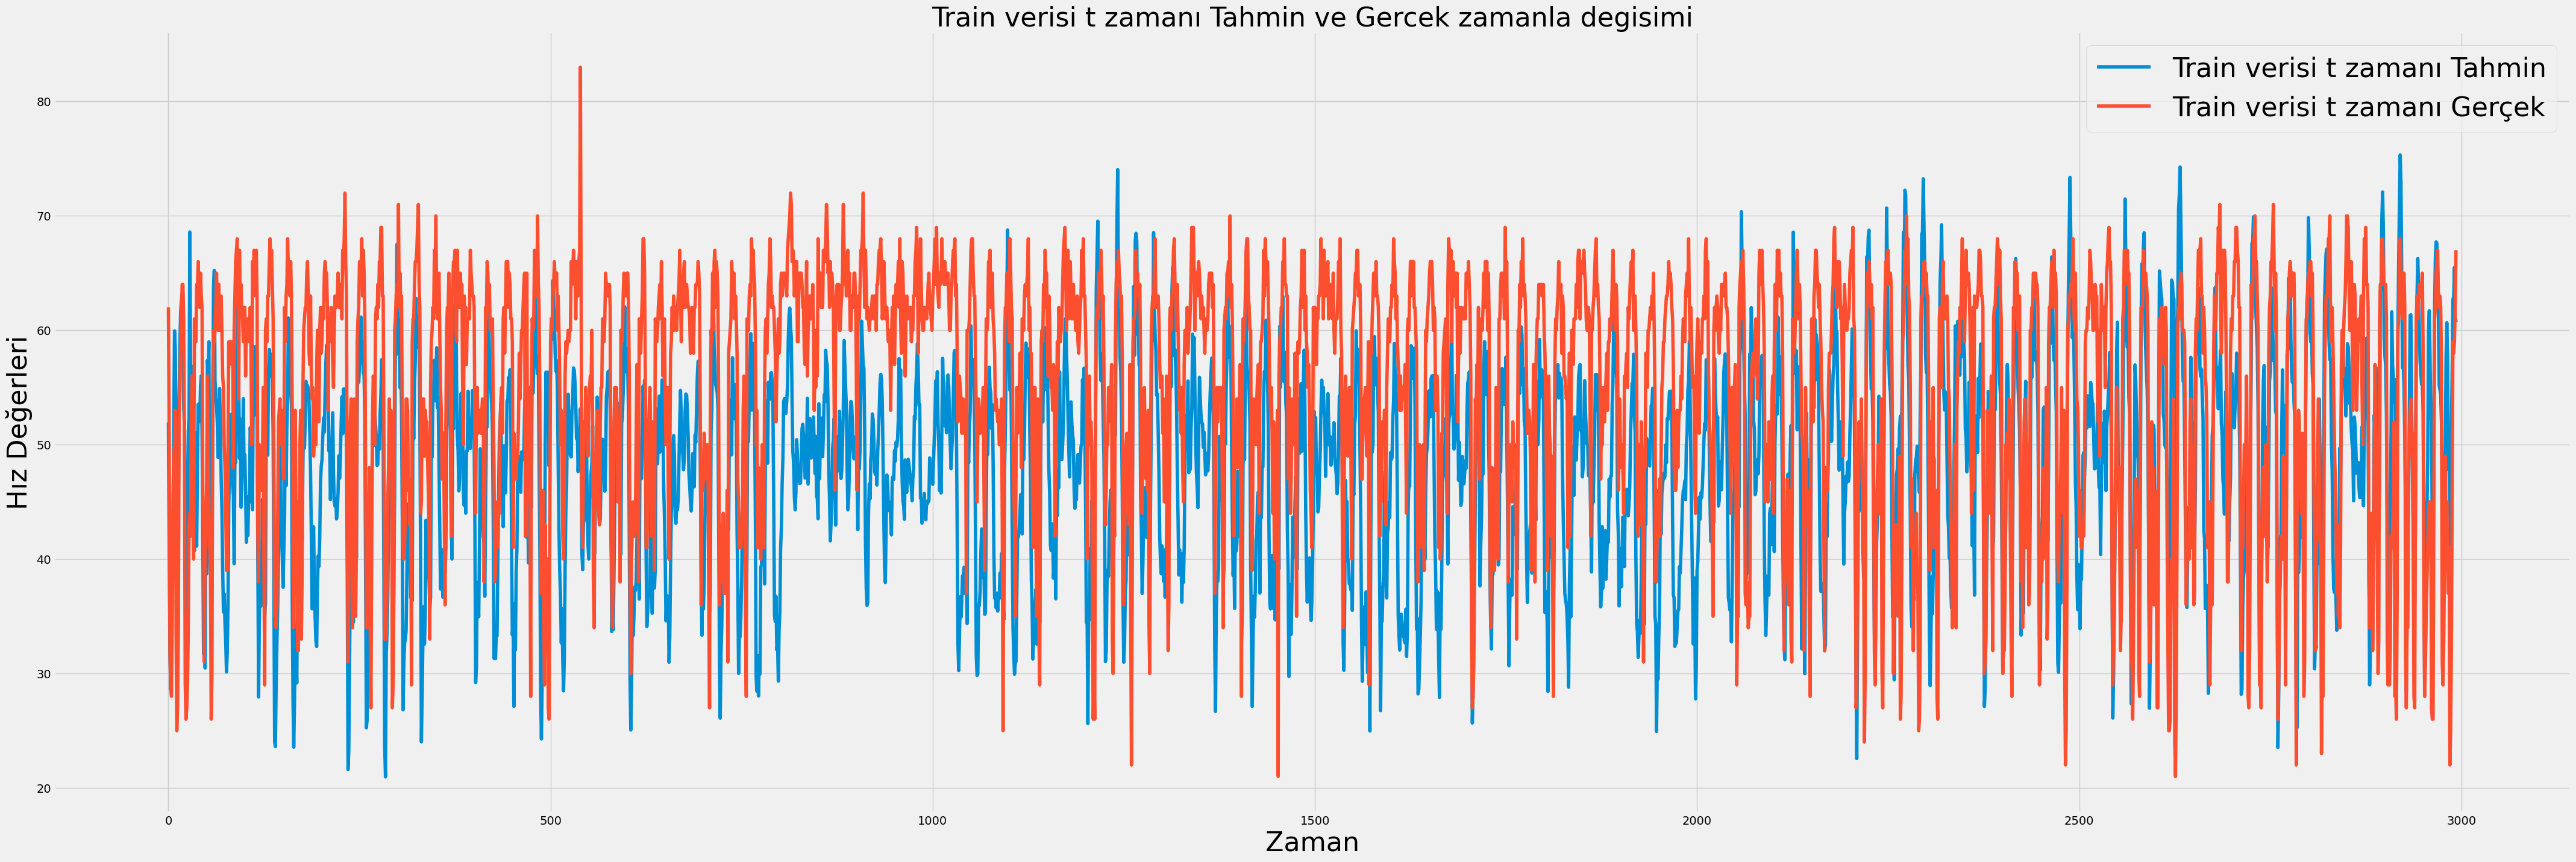

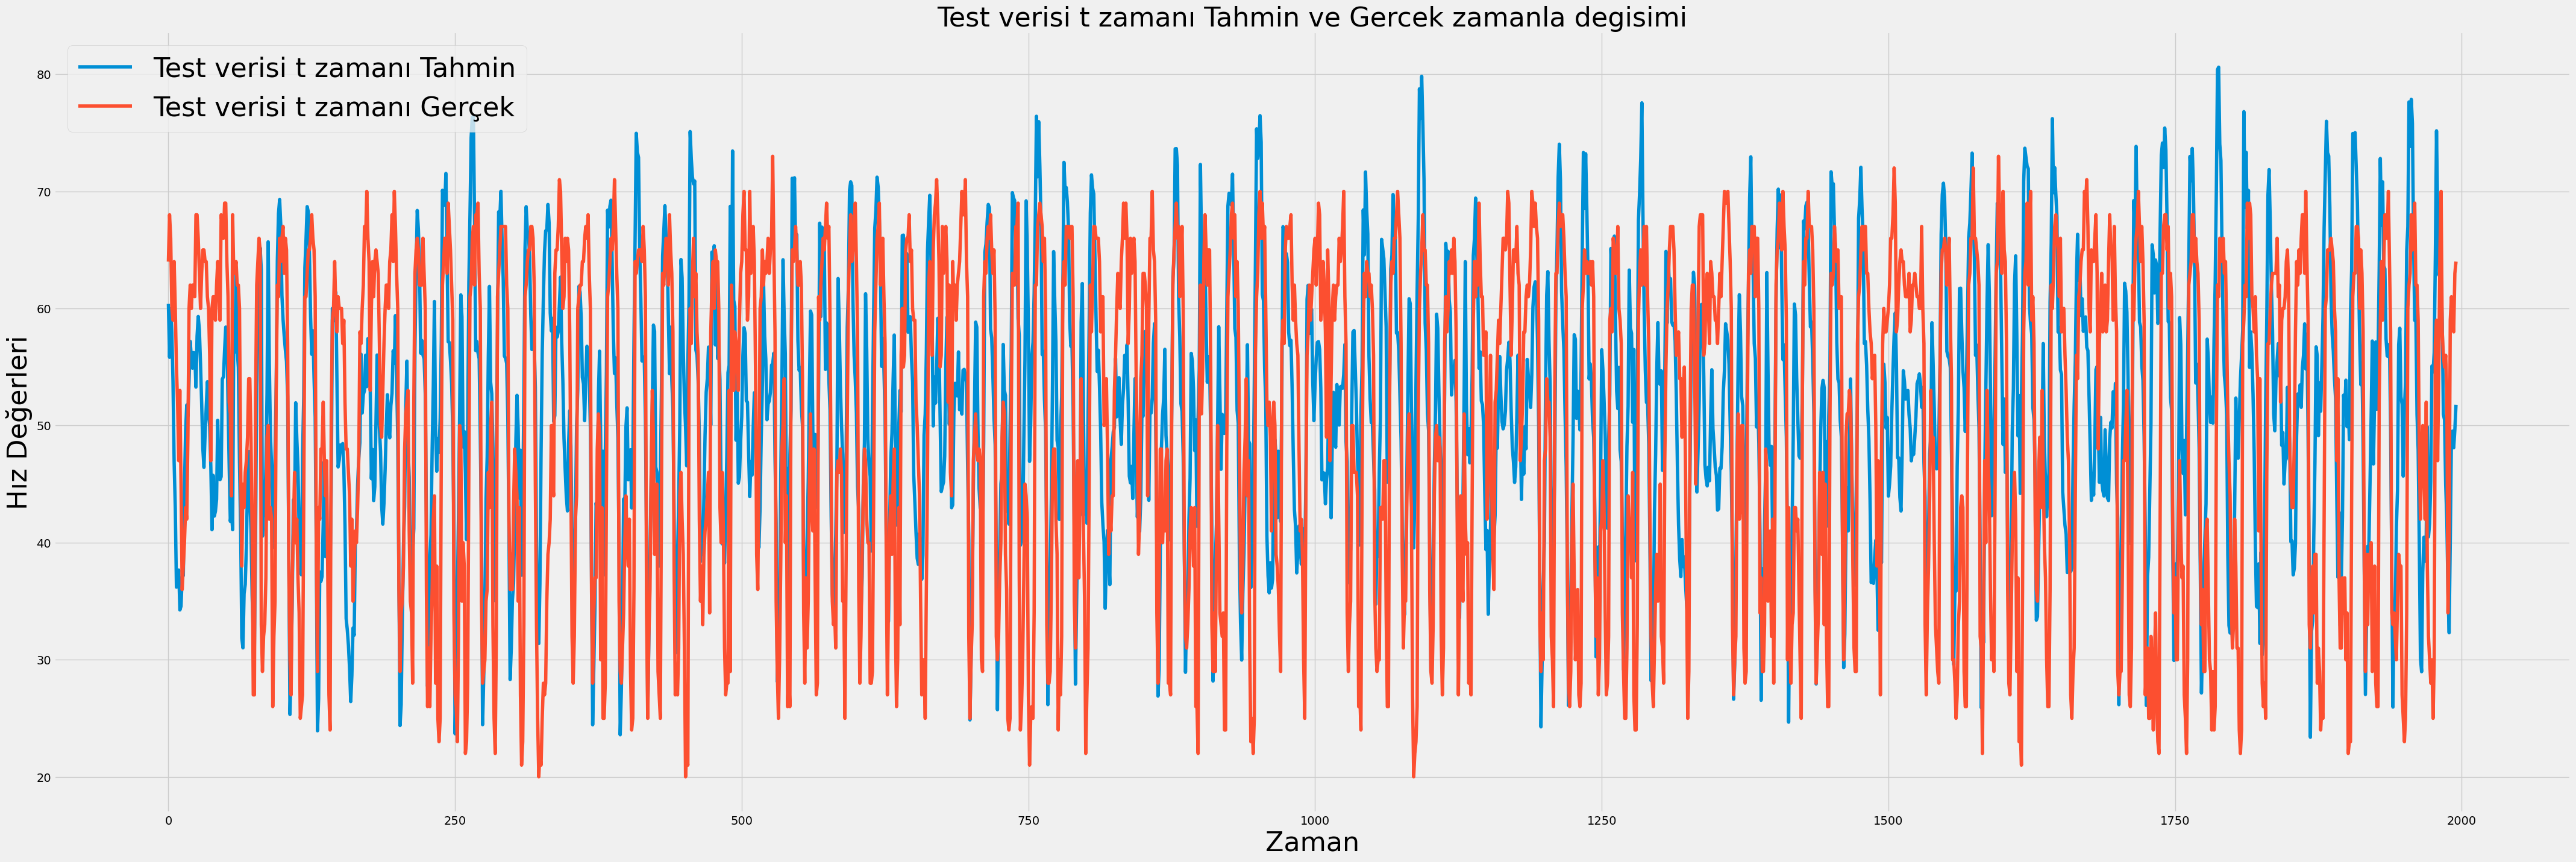

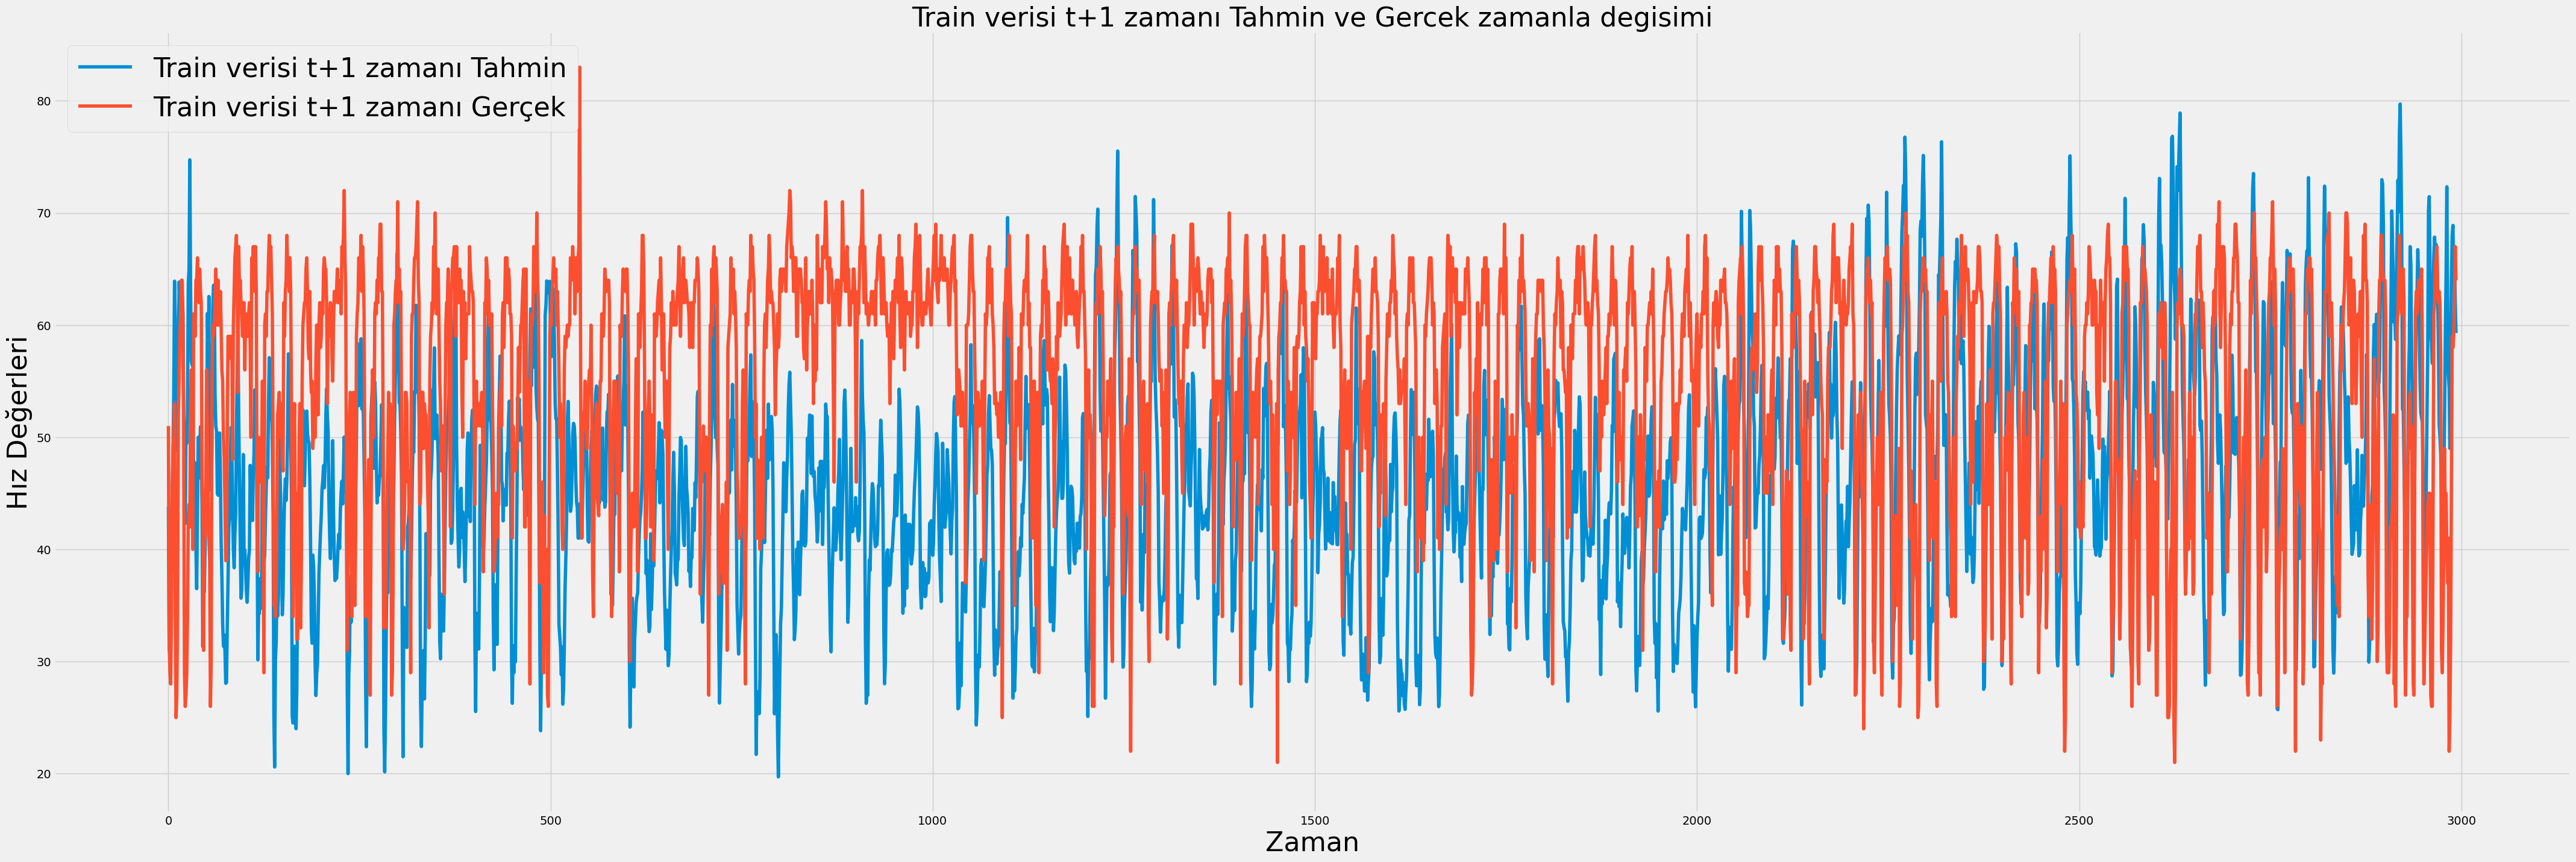

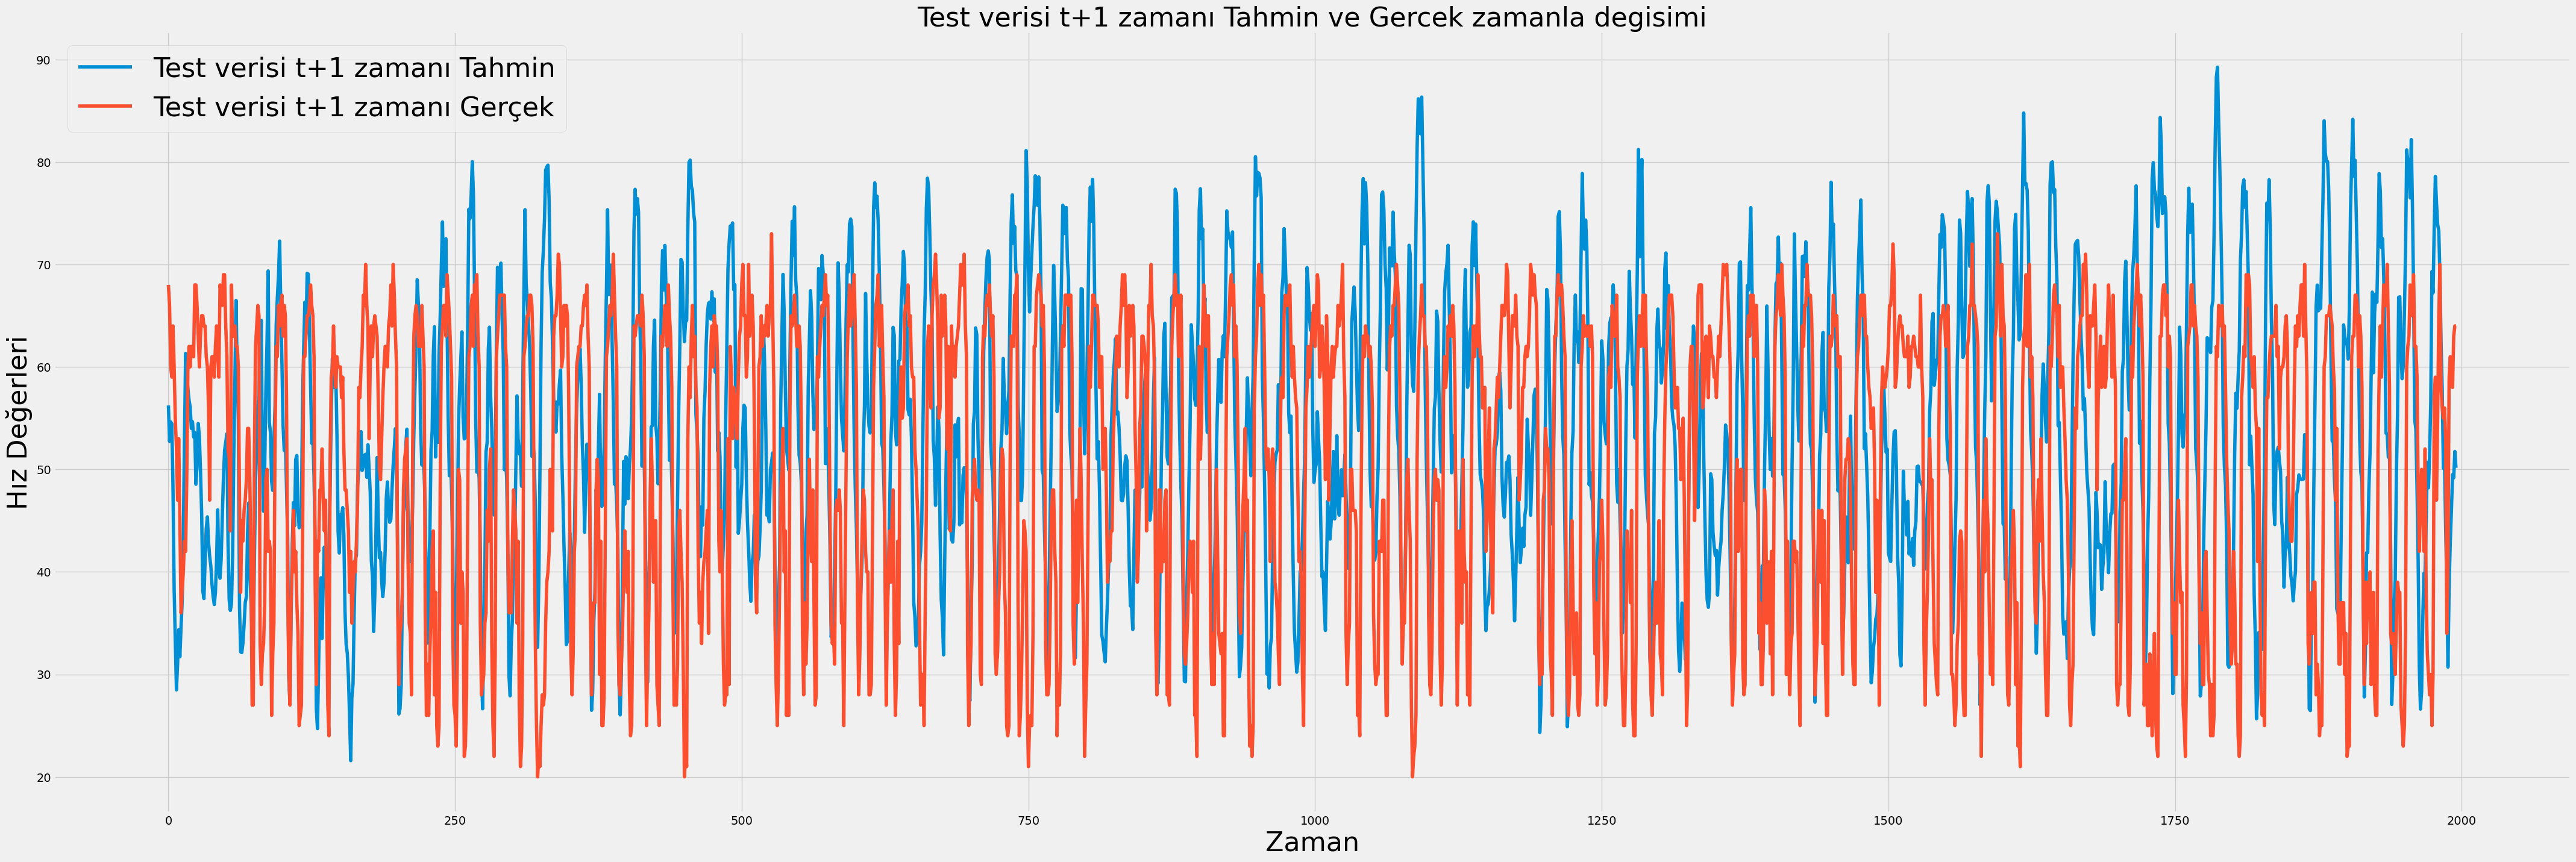

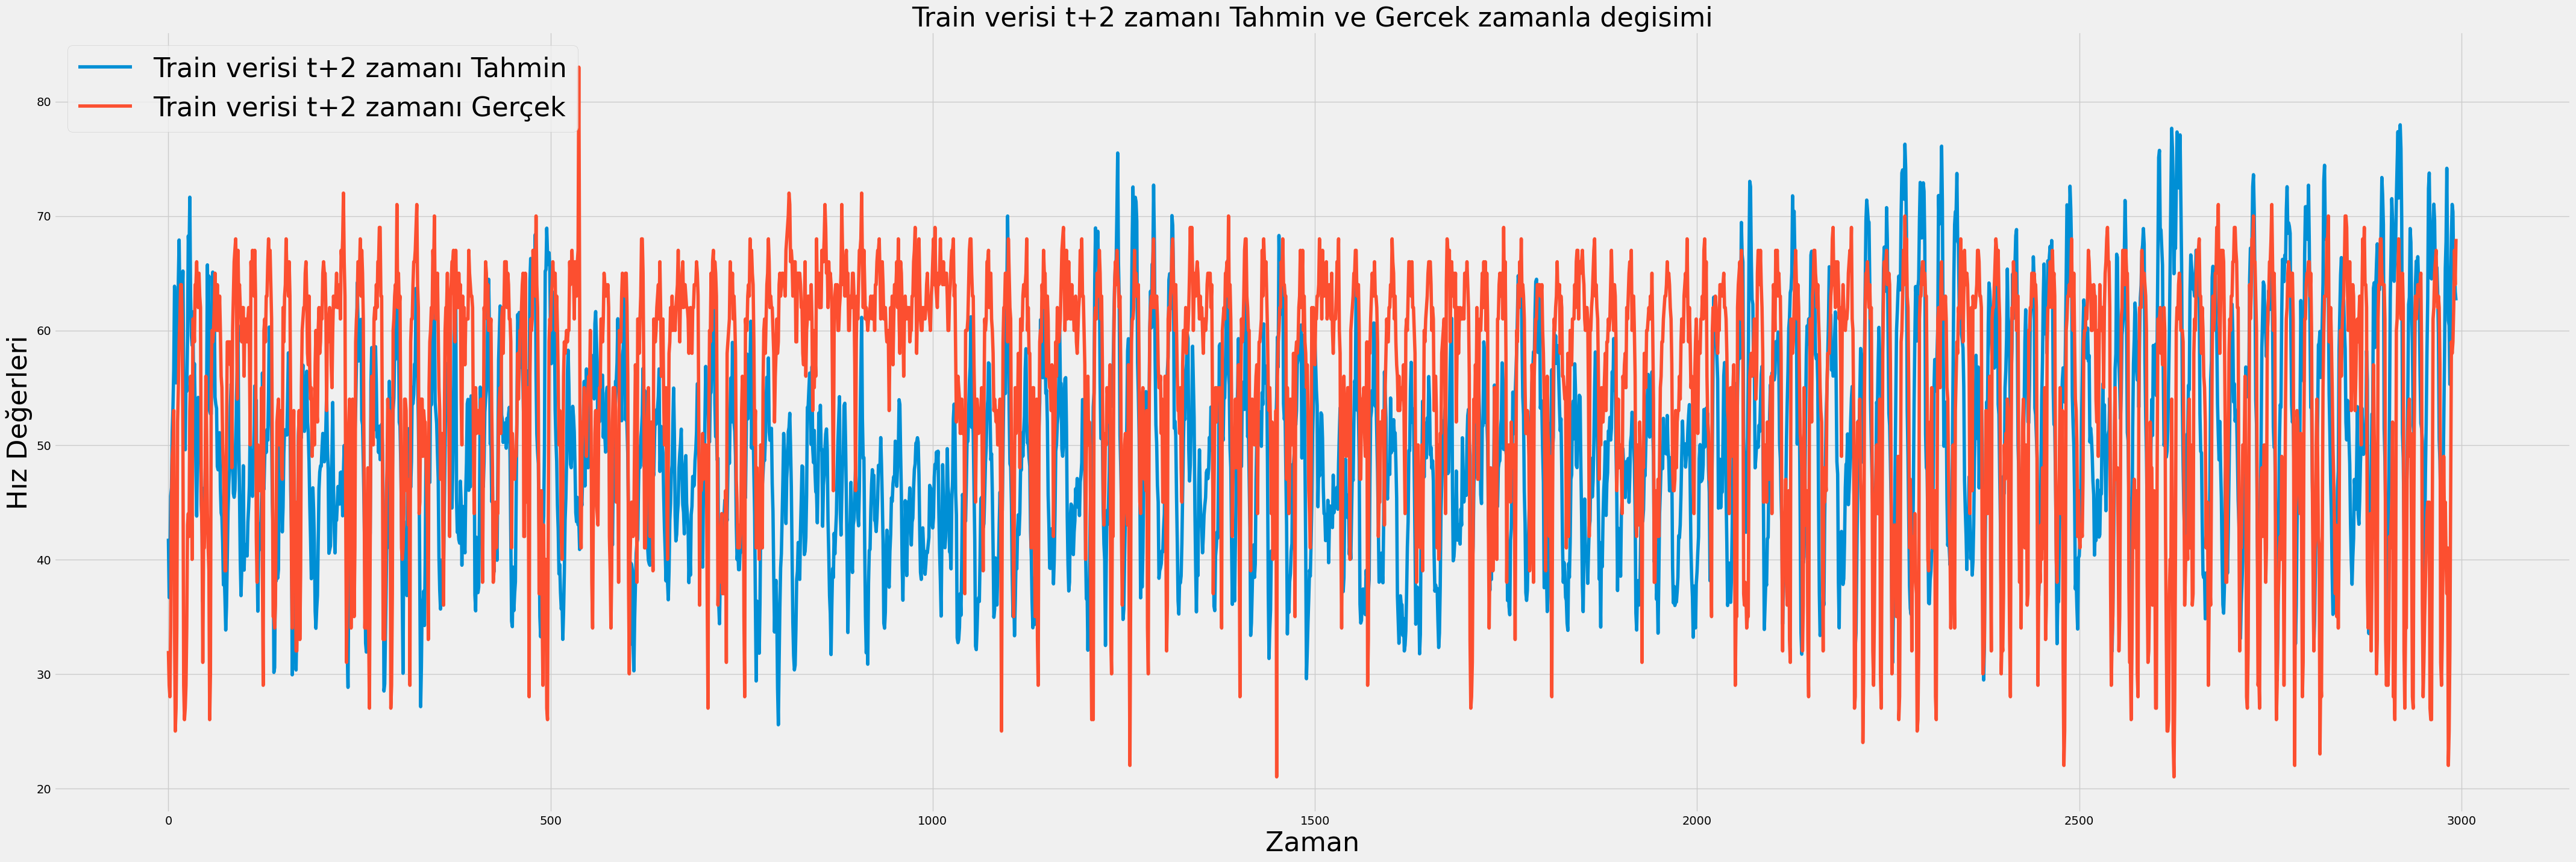

In [26]:
# 10. Test Veri Seti icin Ag sonucu ve verili cikislari cizdiriyoruz

train_y1=train_y[:,0]
pred_train_y1=pred_train_y[:,0]
plt.figure(figsize=(48, 16))
plt.plot(pred_train_y1, label = "Train verisi t zamanı Tahmin")
plt.plot(train_y1, label = "Train verisi t zamanı Gerçek")
plt.title('Train verisi t zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')

test_y1=test_y[:,0]
pred_test_y1=pred_test_y[:,0]
plt.figure(figsize=(48, 16))
plt.plot(pred_test_y1, label = "Test verisi t zamanı Tahmin")
plt.plot(test_y1, label = "Test verisi t zamanı Gerçek")
plt.title('Test verisi t zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')

train_y2=train_y[:,1]
pred_train_y2=pred_train_y[:,1]
plt.figure(figsize=(48, 16))
plt.plot(pred_train_y2, label = "Train verisi t+1 zamanı Tahmin")
plt.plot(train_y2, label = "Train verisi t+1 zamanı Gerçek")
plt.title('Train verisi t+1 zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')


test_y2=test_y[:,1]
pred_test_y2=pred_test_y[:,1]
plt.figure(figsize=(48, 16))
plt.plot(pred_test_y2, label = "Test verisi t+1 zamanı Tahmin")
plt.plot(test_y2, label = "Test verisi t+1 zamanı Gerçek")
plt.title('Test verisi t+1 zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')

train_y3=train_y[:,2]
pred_train_y3=pred_train_y[:,2]
plt.figure(figsize=(48, 16))
plt.plot(pred_train_y3, label = "Train verisi t+2 zamanı Tahmin")
plt.plot(train_y3, label = "Train verisi t+2 zamanı Gerçek")
plt.title('Train verisi t+2 zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')